## 1. Introduction

In this notebook, we build baseline models using classical machine learning algorithms to predict stock prices. These models will serve as reference points for comparison against more advanced deep learning and hybrid models in later stages.

We'll explore:
- Linear Regression
- Support Vector Regression (SVR)
- Random Forest Regressor
- Gradient Boosting Regressor

All models will be trained on the feature-engineered dataset and evaluated using standard metrics like MAE, RMSE, and R² Score.


## 2. Load Datase

In [12]:
import pandas as pd

# Load the feature-engineered dataset
df = pd.read_csv("data/interim/engineered_features.csv", parse_dates=["Date"], index_col="Date")

# Drop rows with NaNs (due to rolling or lag features)
df.dropna(inplace=True)

# Define features and target
X = df.drop(columns=["Close", "Next_Day_Close"])
y = df["Next_Day_Close"]

X.head()

,Volume,Open,High,Low,Year,Month,Day,DayOfWeek,IsWeekend,Close/Last_lag_1,...,Rolling_Return_7,Rolling_Return_30,SMA_10,EMA_10,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Target_UpDown
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-19,170772700.0,225.95,230.6100,216.78,2023,10,19,3,0,242.68,...,-6.215714,-1.046000,252.836,247.623987,30.809433,-3.492061,-0.583675,271.642200,230.436800,0
2023-10-20,138010100.0,217.01,218.8606,210.42,2023,10,20,4,0,220.11,...,-7.285714,-1.217000,247.982,241.145080,26.751966,-6.176166,-1.702173,276.341633,222.448367,1
2023-10-23,150683400.0,210.00,216.9800,202.51,2023,10,23,0,0,211.99,...,-6.684286,-2.050000,243.223,235.860520,28.525122,-8.201535,-3.002045,279.354604,215.944396,1
2023-10-24,118231100.0,216.50,222.0500,214.11,2023,10,24,1,0,212.08,...,-4.942857,-1.698667,238.513,232.344062,18.123393,-9.340710,-4.269778,280.890045,211.648955,0
2023-10-25,107065100.0,215.88,220.1000,212.20,2023,10,25,2,0,216.52,...,-5.928571,-1.962667,233.456,228.721505,17.381181,-10.453844,-5.506591,282.607958,207.123042,0


## 3. Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

# Split chronologically: train = 80%, test = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

## 4. Evaluation Metrics

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

### 5. Linear Regression

Linear Regression assumes a linear relationship between input features and the target.

**Formula:**
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
$$

We fit the model using Ordinary Least Squares (OLS) to minimize the residual sum of squares between predicted and actual values.


In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Linear Regression Results:")
evaluate_model(y_test, lr_preds)

Linear Regression Results:
MAE: 19.2567
RMSE: 22.4316
R² Score: -0.3020


### 6. Support Vector Regression (SVR)

SVR tries to fit the best line within a threshold (ε) margin. It uses kernel functions (e.g., RBF) for non-linear mapping.

**Key Idea:** Only points outside the ε margin (support vectors) contribute to the cost function.


In [16]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

print("SVR Results:")
evaluate_model(y_test, svr_preds)

SVR Results:
MAE: 27.8200
RMSE: 34.5027
R² Score: -2.0802


### 7. Random Forest Regressor

Random Forest is an ensemble of decision trees trained on bootstrapped datasets with feature randomness.

**Key Concept:**
- Reduces variance
- Handles non-linearity
- Less prone to overfitting than individual trees


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
evaluate_model(y_test, rf_preds)

Random Forest Results:
MAE: 9.0493
RMSE: 11.8843
R² Score: 0.6346


### 8. Gradient Boosting Regressor

Boosting trains models sequentially, where each new model corrects the errors of its predecessor.

**Key Idea:**
Minimize the loss function (e.g., squared error) using gradient descent-like steps.

We use `HistGradientBoostingRegressor` for speed and accuracy.


In [18]:
from sklearn.ensemble import HistGradientBoostingRegressor

gb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("Gradient Boosting Results:")
evaluate_model(y_test, gb_preds)

Gradient Boosting Results:
MAE: 8.7224
RMSE: 11.4022
R² Score: 0.6636


## 9. Model Comparison

In [19]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "SVR", "Random Forest", "Gradient Boosting"],
    "MAE": [
        mean_absolute_error(y_test, lr_preds),
        mean_absolute_error(y_test, svr_preds),
        mean_absolute_error(y_test, rf_preds),
        mean_absolute_error(y_test, gb_preds),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_preds)),
        np.sqrt(mean_squared_error(y_test, svr_preds)),
        np.sqrt(mean_squared_error(y_test, rf_preds)),
        np.sqrt(mean_squared_error(y_test, gb_preds)),
    ],
    "R²": [
        r2_score(y_test, lr_preds),
        r2_score(y_test, svr_preds),
        r2_score(y_test, rf_preds),
        r2_score(y_test, gb_preds),
    ]
})

results.sort_values("RMSE")

,Model,MAE,RMSE,R²
3,Gradient Boosting,8.722436,11.402184,0.663601
2,Random Forest,9.049318,11.884262,0.634554
0,Linear Regression,19.256707,22.431577,-0.301961
1,SVR,27.820035,34.502685,-2.080238


## 10. Visualization of Model Performance

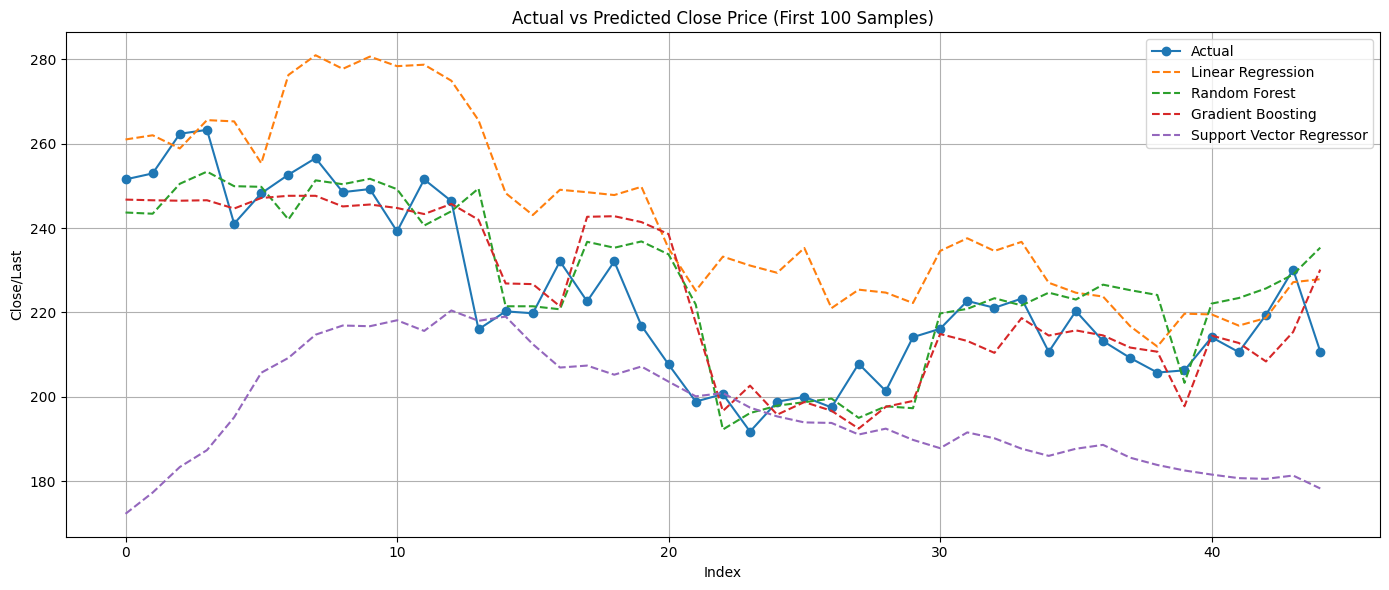

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Dictionary to store all regression predictions
regression_results = {
    "Linear Regression": lr_preds,
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds,
    "Support Vector Regressor": svr_preds
}

# 1. 📈 Actual vs Predicted (first 100 samples)
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
for name, pred in regression_results.items():
    plt.plot(pred[:100], label=name, linestyle='--')
plt.title("Actual vs Predicted Close Price (First 100 Samples)")
plt.xlabel("Index")
plt.ylabel("Close/Last")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

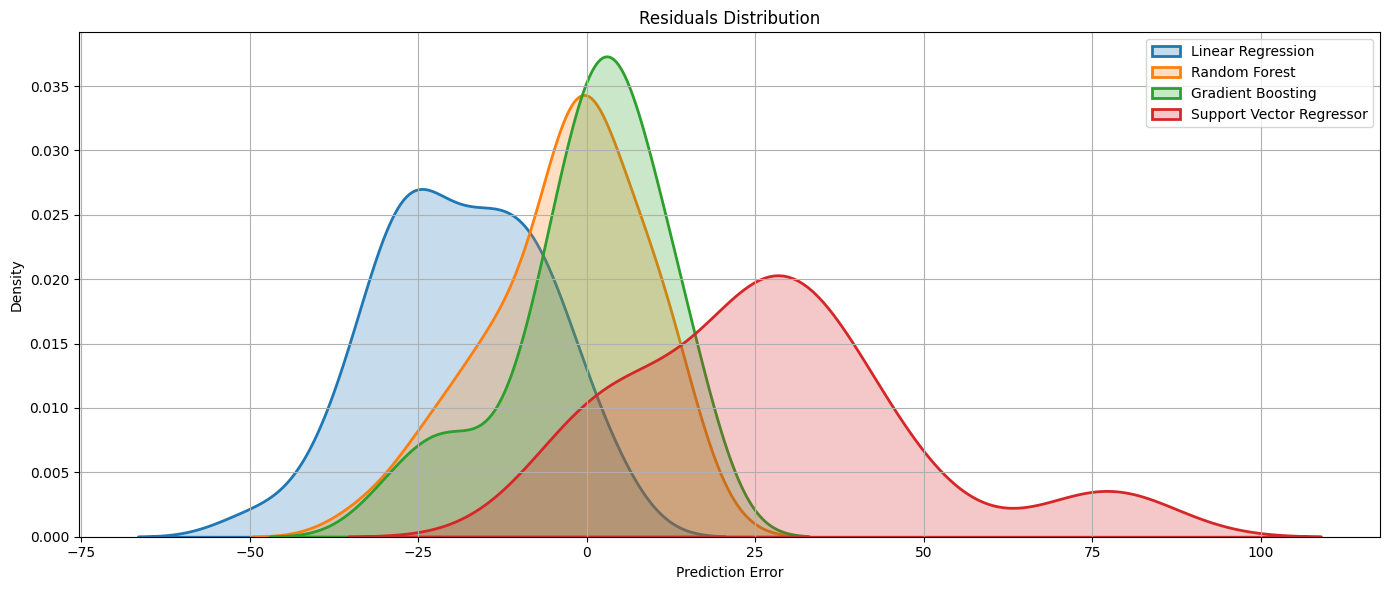

In [21]:
# 2. Residuals Plot (Density)
plt.figure(figsize=(14, 6))
for name, pred in regression_results.items():
    residuals = y_test.values - pred
    sns.kdeplot(residuals, label=name, fill=True, linewidth=2)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-24-e161c6c018d7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mae_df, x="Model", y="MAE", ax=axs[0], palette="Blues_d", legend=False)
<ipython-input-24-e161c6c018d7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_df, x="Model", y="RMSE", ax=axs[1], palette="Greens_d", legend=False)


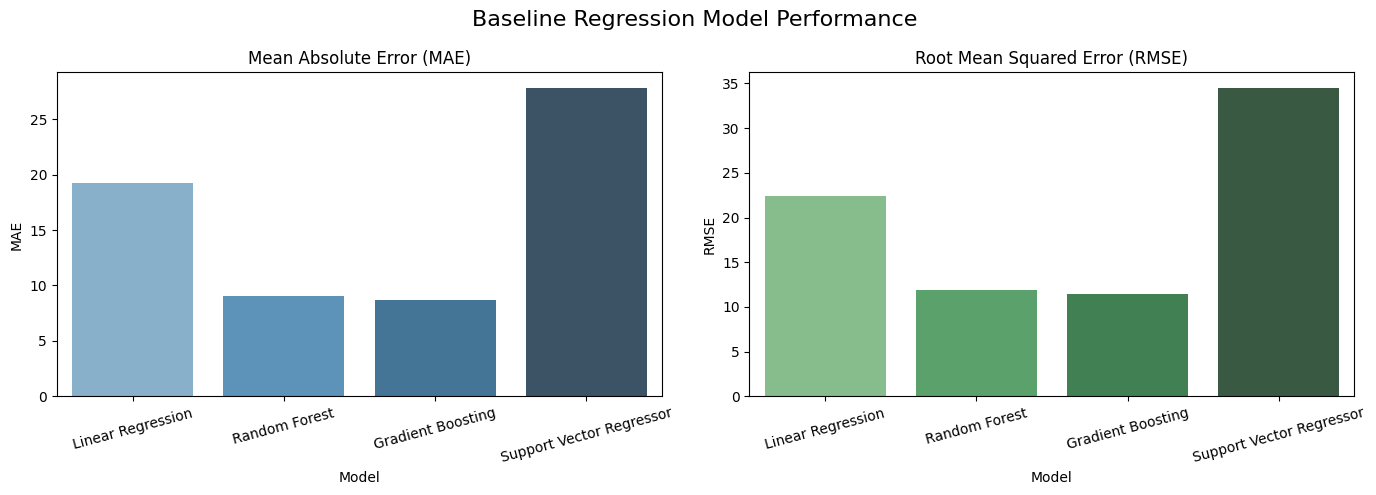

In [24]:
# 3. MAE and RMSE Comparison
mae_scores = {name: mean_absolute_error(y_test, pred) for name, pred in regression_results.items()}
rmse_scores = {name: np.sqrt(mean_squared_error(y_test, pred)) for name, pred in regression_results.items()}

# Prepare data for Seaborn barplots
import pandas as pd

mae_df = pd.DataFrame({
    "Model": list(mae_scores.keys()),
    "MAE": list(mae_scores.values())
})
rmse_df = pd.DataFrame({
    "Model": list(rmse_scores.keys()),
    "RMSE": list(rmse_scores.values())
})

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=mae_df, x="Model", y="MAE", ax=axs[0], palette="Blues_d", legend=False)
axs[0].set_title("Mean Absolute Error (MAE)")
axs[0].tick_params(axis='x', rotation=15)

sns.barplot(data=rmse_df, x="Model", y="RMSE", ax=axs[1], palette="Greens_d", legend=False)
axs[1].set_title("Root Mean Squared Error (RMSE)")
axs[1].tick_params(axis='x', rotation=15)

plt.suptitle("Baseline Regression Model Performance", fontsize=16)
plt.tight_layout()
plt.show()